In [1]:
%cd ~/p/npworks/20200222-Vero-SCV2/

/blaze/hyeshik/p/npworks/20200222-Vero-SCV2


In [2]:
orfcolors = pd.read_csv('colorcode-rainbow.txt', sep=' ', names=['orf', 'color'], index_col=0)['color'].to_dict()
orfcolors

{'ORF1a': '#c5d9ea',
 'ORF1b': '#e8d2c4',
 'S': '#82c91e',
 'ORF3a': '#3bc9db',
 'E': '#228be6',
 'M': '#9fb1fc',
 'ORF6': '#7950f2',
 'ORF7a': '#da77f2',
 'ORF7b': '#e64980',
 'ORF8': '#fd7e14',
 'N': '#ffd43b'}

In [3]:
from io import StringIO

In [4]:
can_prod_counts = pd.read_csv(StringIO("""N				7,084,788
S				1,138,547
ORF7a				700,590
ORF3a				618,897
ORF8				233,622
M				218,170
E				150,030
ORF6				38,908
ORF7b				8,641
ORF1ab				12""".replace('\t\t\t\t', '\t').replace(',', '')), sep='\t', names=['orf', 'count'])

In [5]:
can_prod_counts

,orf,count
0,N,7084788
1,S,1138547
2,ORF7a,700590
3,ORF3a,618897
4,ORF8,233622
5,M,218170
6,E,150030
7,ORF6,38908
8,ORF7b,8641
9,ORF1ab,12


In [6]:
ORForder = list(orfcolors.keys())
ORForder = ['ORF1ab'] + ORForder[2:]

In [7]:
orfcolors['ORF1ab'] = orfcolors['ORF1a']

In [8]:
can_prod_counts['order'] = can_prod_counts['orf'].apply(lambda x: ORForder.index(x))
can_prod_counts['color'] = can_prod_counts['orf'].apply(lambda x: orfcolors[x])
can_prod_counts

,orf,count,order,color
0,N,7084788,9,#ffd43b
1,S,1138547,1,#82c91e
2,ORF7a,700590,6,#da77f2
3,ORF3a,618897,2,#3bc9db
4,ORF8,233622,8,#fd7e14
5,M,218170,4,#9fb1fc
6,E,150030,3,#228be6
7,ORF6,38908,5,#7950f2
8,ORF7b,8641,7,#e64980
9,ORF1ab,12,0,#c5d9ea


In [9]:
nonproductive_counts = pd.DataFrame([
    ['TRSL-tr', 26040],
    ['TRSL-np', 23716],
    ['D-np', 291244],
    ['D-fusion', 168666],
    ['P-np', 195755],
    ['P-fusion', 122280],
], columns=['orf', 'count'])

In [10]:
nonproductive_counts['order'] = np.arange(len(nonproductive_counts)) + 100
nonproductive_counts['color'] = ['#' + ('%02x' % int(i) * 3)
                                 for i in np.linspace(0, 200, len(nonproductive_counts))]

In [11]:
fullcounts = pd.concat([can_prod_counts, nonproductive_counts]).reset_index(drop=True)
fullcounts['count'].sum()

11019906

In [12]:
fullcounts['pct'] = fullcounts['count'] / fullcounts['count'].sum() * 100

In [13]:
fullcounts = fullcounts.sort_values(by='order').copy()
fullcounts

,orf,count,order,color,pct
9,ORF1ab,12,0,#c5d9ea,0.000109
1,S,1138547,1,#82c91e,10.331731
3,ORF3a,618897,2,#3bc9db,5.616173
6,E,150030,3,#228be6,1.361445
5,M,218170,4,#9fb1fc,1.979781
7,ORF6,38908,5,#7950f2,0.353070
2,ORF7a,700590,6,#da77f2,6.357495
8,ORF7b,8641,7,#e64980,0.078413
4,ORF8,233622,8,#fd7e14,2.120000
0,N,7084788,9,#ffd43b,64.290821


In [14]:
fullcounts['bottom'] = [0] + fullcounts['pct'].cumsum().tolist()[:-1]
fullcounts['top'] = fullcounts['bottom'] + fullcounts['pct']

In [15]:
fullcounts

,orf,count,order,color,pct,bottom,top
9,ORF1ab,12,0,#c5d9ea,0.000109,0.000000,0.000109
1,S,1138547,1,#82c91e,10.331731,0.000109,10.331839
3,ORF3a,618897,2,#3bc9db,5.616173,10.331839,15.948013
6,E,150030,3,#228be6,1.361445,15.948013,17.309458
5,M,218170,4,#9fb1fc,1.979781,17.309458,19.289239
7,ORF6,38908,5,#7950f2,0.353070,19.289239,19.642309
2,ORF7a,700590,6,#da77f2,6.357495,19.642309,25.999804
8,ORF7b,8641,7,#e64980,0.078413,25.999804,26.078217
4,ORF8,233622,8,#fd7e14,2.120000,26.078217,28.198217
0,N,7084788,9,#ffd43b,64.290821,28.198217,92.489038


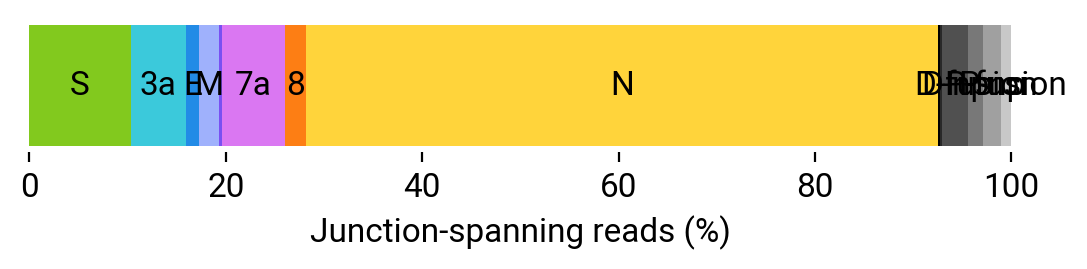

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5.6, 1.5))

for _, row in fullcounts.iterrows():
    ax.barh([0.5], [row['pct']], 1, left=[row['bottom']],
           fc=row['color'], zorder=1)
    if row['pct'] >= 1:
        ax.annotate(row['orf'].replace('ORF', ''), ((row['bottom'] + row['top'])/2, 0.5),
                    ha='center', fontsize=12, va='center')

ax.set_xlim(0, 100)
for spname in 'top left right bottom'.split():
    ax.spines[spname].set_visible(False)

plt.setp(ax.get_yticklines(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel('Junction-spanning reads (%)')

plt.tight_layout()
plt.savefig('figure-outputs/plot-jctstats.pdf')